## Question 1

In [ ]:
import numpy as np
import pandas as pd
import heapq

In [ ]:
import csv

with open('/content/abc.txt', 'r') as input_file:

    with open('/content/output.csv', 'w', newline='') as output_file:
        writer = csv.writer(output_file)

        for line in input_file:
            values = line.strip().split()
            writer.writerow(values)

In [ ]:
import pandas as pd
d=pd.read_csv('/content/output.csv')
from_node=list(d['from'])
to_node=list(d['to'])

In [ ]:
n=max(max(from_node),max(to_node))
adj_mtx=np.zeros((n,n))
for i in range(len(from_node)):
  adj_mtx[from_node[i]-1][to_node[i]-1]=1

In [ ]:
print(len(adj_mtx))

8297


In [ ]:
m=np.asmatrix(adj_mtx)

In [ ]:
df=pd.DataFrame(m)
df.index = np.arange(1, len(df) + 1)
df.columns = np.arange(1, len(df) + 1)
df

,1,2,3,4,5,6,7,8,9,10,...,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
edge_list=[]
for i in range(len(from_node)):
  l=()
  l=(from_node[i],to_node[i])
  edge_list.append(l)

In [ ]:
print(edge_list)

[(30, 1412), (30, 3352), (30, 5254), (30, 5543), (30, 7478), (3, 28), (3, 30), (3, 39), (3, 54), (3, 108), (3, 152), (3, 178), (3, 182), (3, 214), (3, 271), (3, 286), (3, 300), (3, 348), (3, 349), (3, 371), (3, 567), (3, 581), (3, 584), (3, 586), (3, 590), (3, 604), (3, 611), (3, 8283), (25, 3), (25, 6), (25, 8), (25, 19), (25, 23), (25, 28), (25, 29), (25, 30), (25, 33), (25, 35), (25, 50), (25, 54), (25, 55), (25, 75), (25, 80), (25, 86), (25, 94), (25, 127), (25, 152), (25, 154), (25, 182), (25, 192), (25, 214), (25, 224), (25, 226), (25, 246), (25, 252), (25, 255), (25, 257), (25, 261), (25, 271), (25, 273), (25, 280), (25, 282), (25, 286), (25, 299), (25, 300), (25, 302), (25, 306), (25, 308), (25, 310), (25, 322), (25, 325), (25, 339), (25, 348), (25, 349), (25, 356), (25, 358), (25, 363), (25, 370), (25, 371), (25, 373), (25, 377), (25, 379), (25, 407), (25, 415), (25, 422), (25, 428), (25, 439), (25, 488), (25, 514), (25, 545), (25, 549), (25, 560), (25, 590), (25, 592), (25, 6

In [ ]:
total_nodes=set(from_node+to_node)
print(len(total_nodes))

7115


In [ ]:
edges=0
for i in range(len(adj_mtx)):
  for j in range(len(adj_mtx)):
    if(adj_mtx[i][j]==1):
      edges+=1
print(edges)

103689


In [ ]:
in_deg={}

for i in range(len(adj_mtx)):
  c=0
  flag=0
  for j in range(len(adj_mtx)):
    if(adj_mtx[j][i]==1):
      flag=1
      c+=1
  if(flag==1):
    in_deg[i+1]=c

In [ ]:
n=len(in_deg)
print(n)
print(in_deg)

2381
{3: 31, 6: 20, 8: 44, 10: 15, 15: 361, 19: 22, 23: 22, 28: 122, 29: 41, 30: 23, 32: 14, 33: 34, 34: 20, 35: 110, 36: 34, 38: 14, 39: 28, 49: 22, 50: 32, 54: 40, 55: 67, 56: 149, 61: 20, 64: 9, 72: 154, 75: 69, 80: 43, 86: 108, 89: 16, 93: 17, 94: 27, 95: 39, 105: 21, 108: 11, 127: 19, 130: 20, 132: 28, 135: 35, 140: 22, 144: 29, 147: 15, 150: 26, 151: 37, 152: 51, 153: 18, 154: 18, 155: 53, 163: 14, 167: 12, 168: 24, 171: 53, 175: 19, 178: 35, 182: 32, 183: 27, 188: 1, 192: 27, 204: 131, 214: 175, 216: 21, 219: 18, 222: 8, 224: 18, 226: 21, 227: 27, 228: 44, 230: 44, 232: 22, 236: 21, 243: 84, 246: 23, 250: 22, 252: 38, 255: 26, 257: 25, 258: 13, 259: 78, 261: 24, 271: 192, 273: 13, 274: 29, 280: 22, 282: 101, 285: 61, 286: 19, 290: 136, 291: 2, 298: 46, 299: 158, 300: 22, 301: 13, 302: 24, 304: 46, 306: 22, 308: 41, 310: 43, 311: 47, 313: 46, 314: 13, 317: 49, 319: 18, 321: 43, 322: 43, 324: 16, 325: 45, 332: 55, 334: 41, 338: 15, 339: 20, 341: 13, 346: 41, 348: 35, 349: 15, 350:

In [ ]:
total_in=sum(in_deg.values())
print(total_in)

103689


In [ ]:
avg_in_deg=total_in/n
print(avg_in_deg)

43.54850902981941


In [ ]:
out_deg={}

for i in range(len(adj_mtx)):
  c=0
  flag=0
  for j in range(len(adj_mtx)):
    if(adj_mtx[i][j]==1):
      flag=1
      c+=1
  if(flag==1):
    out_deg[i+1]=c

In [ ]:
n=len(out_deg)
print(n)
print(out_deg)

6110
{3: 23, 4: 29, 5: 23, 6: 302, 7: 24, 8: 182, 9: 81, 10: 86, 11: 743, 12: 65, 13: 11, 14: 114, 15: 50, 16: 15, 17: 45, 18: 12, 19: 39, 20: 187, 21: 76, 22: 2, 23: 74, 24: 309, 25: 90, 26: 95, 27: 102, 28: 133, 29: 150, 30: 5, 31: 15, 32: 4, 33: 24, 34: 5, 35: 65, 36: 227, 37: 20, 38: 14, 39: 41, 40: 11, 41: 30, 42: 89, 43: 4, 44: 44, 45: 8, 46: 59, 47: 146, 48: 21, 49: 15, 50: 14, 51: 24, 52: 1, 53: 39, 54: 7, 55: 64, 56: 24, 57: 13, 58: 38, 59: 94, 60: 9, 62: 17, 63: 1, 64: 1, 65: 2, 66: 44, 67: 17, 68: 275, 71: 109, 72: 164, 73: 13, 74: 69, 75: 31, 76: 2, 77: 25, 78: 41, 79: 53, 80: 59, 81: 18, 82: 1, 83: 8, 84: 1, 85: 1, 86: 122, 87: 195, 88: 1, 89: 29, 90: 72, 91: 2, 92: 5, 93: 1, 94: 80, 95: 2, 96: 2, 98: 8, 99: 24, 100: 5, 101: 16, 102: 5, 103: 68, 104: 30, 105: 3, 106: 9, 107: 4, 108: 2, 109: 190, 110: 95, 111: 29, 112: 1, 113: 89, 114: 1, 115: 3, 116: 2, 117: 1, 118: 1, 119: 1, 120: 8, 121: 9, 122: 213, 123: 1, 124: 3, 125: 29, 126: 25, 127: 132, 128: 80, 129: 4, 130: 13, 1

In [ ]:
total_out=sum(out_deg.values())
print(total_out)

103689


In [ ]:
avg_out_deg=total_out/n
print(avg_out_deg)

16.97037643207856


In [ ]:
max_in_deg=max(in_deg.values())
print(max_in_deg)
ik = [key for key, val in in_deg.items() if val == max_in_deg]
print(ik)

457
[4037]


In [ ]:
max_out_deg=max(out_deg.values())
print(max_out_deg)
ok = [key for key, val in out_deg.items() if val == max_out_deg]
print(ok)

893
[2565]


In [ ]:
n=len(total_nodes)
max_poss_edge=(n*(n-1))
density=edges/max_poss_edge
print(density)

0.0020485375110809584


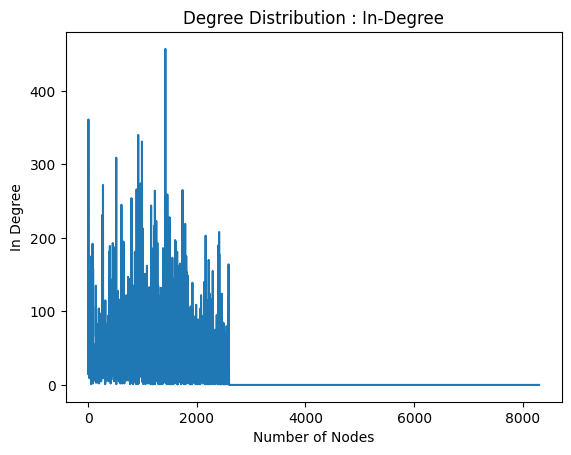

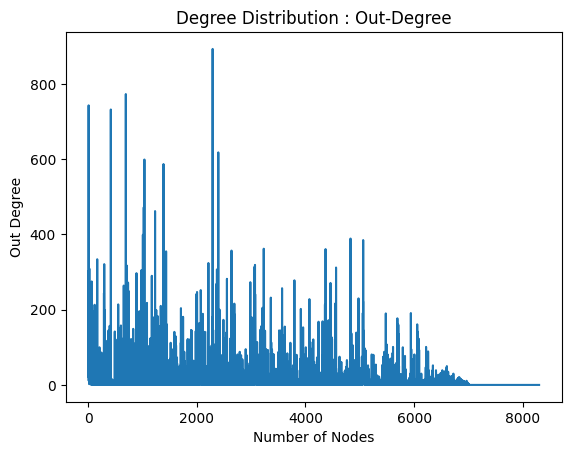

In [ ]:
import matplotlib.pyplot as plt

for i,j in enumerate(total_nodes):
  if(j not in in_deg.keys()):
    in_deg[j]=0
  if(j not in out_deg.keys()):
    out_deg[j]=0

in_degrees = [ i for i in in_deg.values()]
out_degrees = [i for i in out_deg.values()]

plt.plot(list(total_nodes),in_degrees)
plt.title("Degree Distribution : In-Degree")
plt.xlabel("Number of Nodes")
plt.ylabel("In Degree")
plt.show()

plt.plot(list(total_nodes),out_degrees)
plt.title("Degree Distribution : Out-Degree")
plt.xlabel("Number of Nodes")
plt.ylabel("Out Degree")
plt.show()

In [ ]:
def local_clustering_coefficient(adj_matrix):
  lcc = {}
  n = len(adj_matrix)
  t = np.dot(adj_matrix, adj_matrix.T)
  degrees = np.sum(adj_matrix, axis=0)
  coeffs = np.zeros(n)

  for i in range(n):
      if degrees[i] <= 1:
          coeffs[i] = 0.0
      else:
          tri = t[i,i]
          coeffs[i] = 2.0 * tri / (degrees[i] * (degrees[i] - 1))
      lcc[i+1]=coeffs[i]

  return lcc


In [ ]:
cluster_coefficient=local_clustering_coefficient(adj_mtx)
print(cluster_coefficient)


{1: 0.0, 2: 0.0, 3: 0.04946236559139785, 4: 0.0, 5: 0.0, 6: 1.5894736842105264, 7: 0.0, 8: 0.19238900634249473, 9: 0.0, 10: 0.819047619047619, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0007694675284702986, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.16883116883116883, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.3203463203463203, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.018019238585557512, 29: 0.18292682926829268, 30: 0.019762845849802372, 31: 0.0, 32: 0.04395604395604396, 33: 0.0427807486631016, 34: 0.02631578947368421, 35: 0.010842368640533779, 36: 0.40463458110516937, 37: 0.0, 38: 0.15384615384615385, 39: 0.10846560846560846, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.06493506493506493, 50: 0.028225806451612902, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.008974358974358974, 55: 0.028946178199909543, 56: 0.0021766733176129148, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.027777777777777776, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 

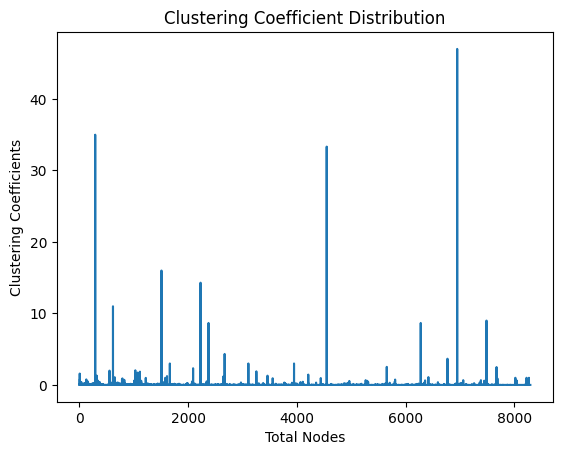

In [ ]:
k = list(cluster_coefficient.keys())
v = list(cluster_coefficient.values())
plt.plot(k,v)
plt.xlabel('Total Nodes')
plt.ylabel('Clustering Coefficients')
plt.title('Clustering Coefficient Distribution')
plt.show()

## Question 2

In [ ]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(edge_list)

pagerank_scores = nx.pagerank(G)
pg_score={}

for node, score in pagerank_scores.items():
  pg_score[node]=score

In [ ]:
print(pg_score)

{30: 0.00017349553934328338, 1412: 0.0008141761230496596, 3352: 0.0017851250122027217, 5254: 0.0021500675059293226, 5543: 0.0010508052619841283, 7478: 0.000812430352613478, 3: 0.00020539498232448021, 28: 0.0016986730322136935, 39: 0.0003439790689580259, 54: 0.00034765464971898025, 108: 0.0004398371153454517, 152: 0.0005817197428805889, 178: 0.00029758488331950184, 182: 0.00016083873728146714, 214: 0.0016599199669365457, 271: 0.0013349240914416604, 286: 0.00017367757770305088, 300: 0.00015065607046072744, 348: 0.00017393564565284635, 349: 9.460415271381966e-05, 371: 0.0002892903392357495, 567: 0.00033152691295165287, 581: 0.00010905154270480289, 584: 0.00022615441013923313, 586: 0.00010518825019481072, 590: 0.00019458075864204938, 604: 0.00018151640169193398, 611: 0.0002164090559846353, 8283: 0.0003287923832617068, 25: 5.0487823458630175e-05, 6: 0.00031183250978437466, 8: 0.00032663557615950425, 19: 0.00013112179292607275, 23: 0.0001712239063742033, 29: 0.00018490986415744417, 33: 0.000

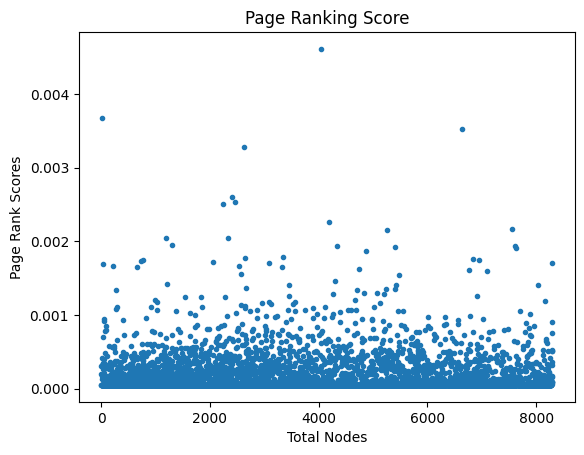

In [ ]:
k = list(pg_score.keys())
v = list(pg_score.values())
plt.plot(k,v,'.')
plt.xlabel('Total Nodes')
plt.ylabel('Page Rank Scores')
plt.title('Page Ranking Score')
plt.show()

In [ ]:
pg_10=heapq.nlargest(10,v)

In [ ]:
authority_scores, hub_scores = nx.hits(G)
auth_hub={}
for node, authority_score in authority_scores.items():
  auth_hub[node]=[authority_score,hub_scores[node]]

In [ ]:
print(auth_hub)

{30: [7.925509536668041e-05, 9.508954835822543e-05], 1412: [-0.0, 0.00012172939864267825], 3352: [0.003381423106344998, 0.002328415091497684], 5254: [0.00037720963088326646, 0.001824739664365002], 5543: [0.0013969722537516516, 0.0012852668947678197], 7478: [-0.0, 0.0007626588344747711], 3: [4.021031639777643e-05, 9.501171858460721e-05], 28: [0.00035693360951943675, 0.0002547506139075197], 39: [0.00010662223573949803, 6.132950503607708e-05], 54: [2.5269620598290827e-05, 0.0001402071358643648], 108: [2.588983177975368e-06, 4.840902379896697e-06], 152: [5.9915578519710095e-05, 0.00012871399187048126], 178: [0.0004364871929359797, 0.0001280833945086009], 182: [0.000666050749150277, 9.346016586177461e-05], 214: [-0.0, 0.0008251269691977231], 271: [-0.0, 0.0007442312255899233], 286: [-0.0, 8.219949441209418e-05], 300: [-0.0, 3.756641059287665e-05], 348: [9.313148244802723e-05, 0.00011304120192581315], 349: [1.0425226312650514e-06, 2.9996853208330947e-05], 371: [0.0009447618732908875, 7.97327

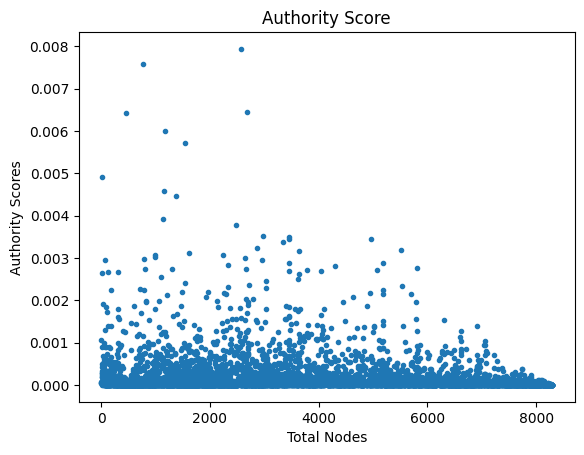

In [ ]:
k = list(auth_hub.keys())
v = list(auth_hub.values())
v=[i[0] for i in v]
plt.plot(k,v,'.')
plt.xlabel('Total Nodes')
plt.ylabel('Authority Scores')
plt.title('Authority Score')
plt.show()

In [ ]:
auth_10=heapq.nlargest(10,v)

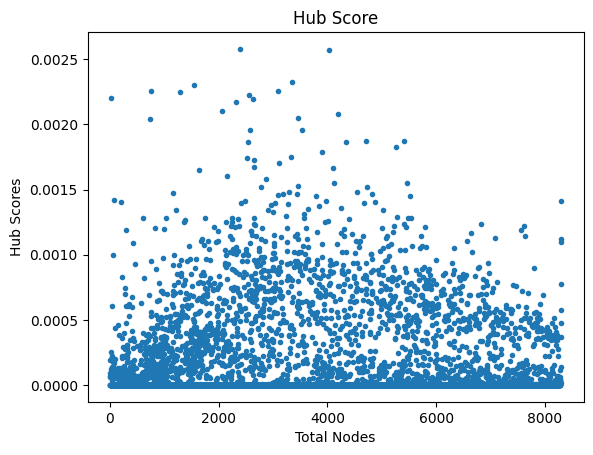

In [ ]:
k = list(auth_hub.keys())
v = list(auth_hub.values())
v=[i[1] for i in v]
plt.plot(k,v,'.')
plt.xlabel('Total Nodes')
plt.ylabel('Hub Scores')
plt.title('Hub Score')
plt.show()

In [ ]:
hub_10=heapq.nlargest(10,v)

In [ ]:
comp = pd.DataFrame({'Pg_score':pg_10 ,'Authority_score': auth_10,'Hub_score': hub_10})
comp.index = np.arange(1, len(comp) + 1)
comp

,Pg_score,Authority_score,Hub_score
1,0.004613,0.007940,0.002580
2,0.003681,0.007574,0.002573
3,0.003525,0.006440,0.002328
4,0.003286,0.006417,0.002304
5,0.002605,0.006011,0.002256
6,0.002530,0.005721,0.002253
7,0.002505,0.004921,0.002250
8,0.002266,0.004572,0.002224
9,0.002170,0.004468,0.002202
10,0.002150,0.003919,0.002198
